In [1]:
import pickle
import pandas as pd
import shap

/Users/wenwei/Library/Python/3.9/lib/python/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("cleaned data/cleaned_data_split.csv")

def load_model(model_path):
    with open(model_path, 'rb') as f:
        return pickle.load(f)
    
predictive_cols_log = ['default_profile', 'default_profile_image',
        'geo_enabled', 'deviation_from_humans', 'location', 'verified',
        'account_age_days', 'is_description_na', 'is_lang_na', 'is_lang_en',
       'is_location_unknown', 'creation_hour', 'creation_day_of_week',
       'creation_month', 'creation_year', 'is_weekend', 'creation_quarter',
       'part_of_day', 'creation_week_of_year', 'is_beginning_of_month',
       'is_end_of_month', 'description_length', 'influencer_type',
       'favourites_per_day', 'favourites_activity',
       'mention_count', 'log_favourites_count', 'log_followers_count', 'log_friends_count',
       'log_statuses_count', 'log_average_tweets_per_day',
       'log_fol_to_friends_ratio', 'log_fol_to_tweets_ratio',
       'log_friends_to_tweets_ratio','account_type']

features = [col for col in predictive_cols_log if col not in ['id', 'account_type', 'X_fold']]

target = 'account_type'


# SHAP Model Explanation

SHAP provides insight into the contribution of each feature to the model’s output, which is crucial for model interpretability.



### Global SHAP

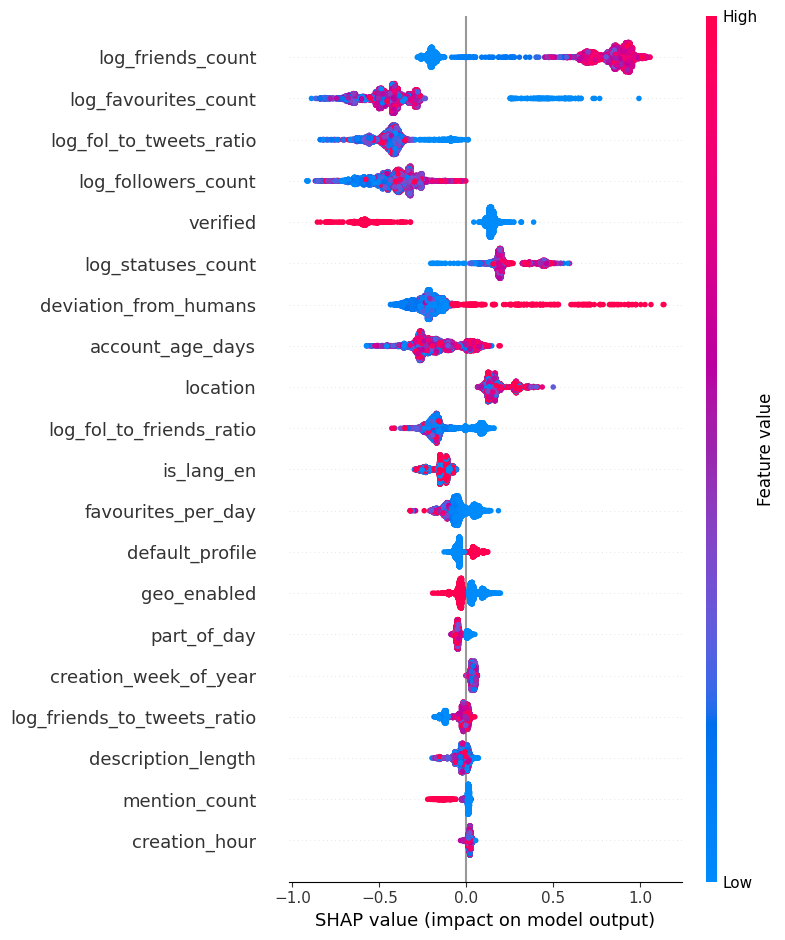

In [3]:

# Load the model from the pickle file
loaded_model = load_model('output_files/{0}_best_model.pkl'.format('xgb')) # change model type here

# Assuming you have your data prepared
explainer = shap.Explainer(loaded_model)
test = df[df['X_fold'] == 'test']
X_test = test[features]
y_test = test[target]    
shap_values = explainer(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test)


### Local SHAP

- Model Interpretability for a specific twitter user

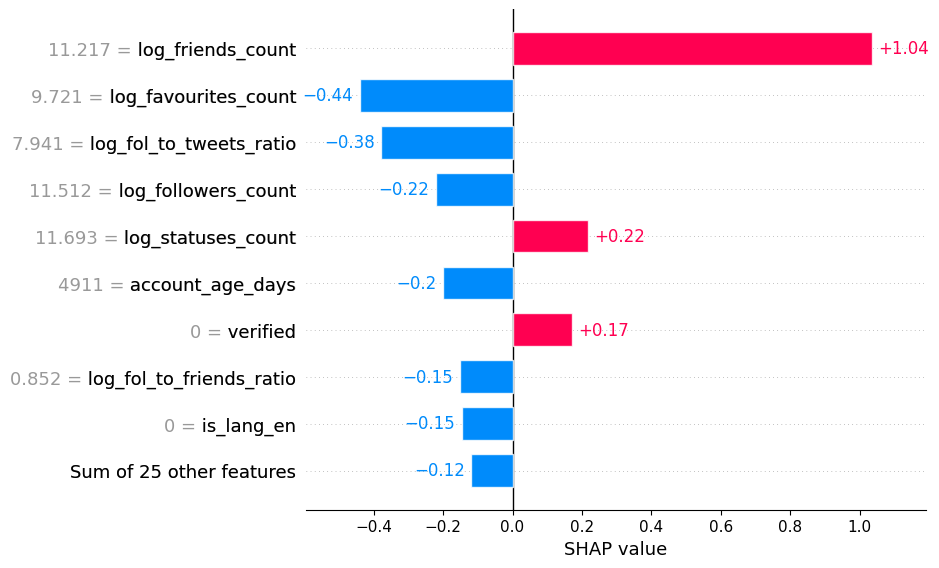

In [4]:
shap.plots.bar(shap_values[0])
